In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt

#设置为seaborn风格
sns.set()
#不显示警告
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif'] = ['SimHei']  #显示中文
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
#读取数据
datas = pd.read_csv('Electric_Vehicle_Population_Data.csv')
datas

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location
0,WA1AAAGE2M,Kitsap,POULSBO,WA,98370,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,23.0,148815901,POINT (-122.63339300000001 47.748427)
1,WBY8P2C00L,King,SEATTLE,WA,98122,2020,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,37.0,132197810,POINT (-122.303413 47.61065)
2,5YJXCBE21K,Cowlitz,SILVERLAKE,WA,98645,2019,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,289,0,20.0,154341673,POINT (-122.772699 46.320526)
3,1FTZR081XY,King,SEATTLE,WA,98117,2000,FORD,RANGER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,58,0,36.0,169378338,POINT (-122.379354 47.687571)
4,WBY1Z6C55H,King,SEATTLE,WA,98119,2017,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,36.0,192605101,POINT (-122.36772100000002 47.639264)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79762,JA4J24A5XJ,King,SEATTLE,WA,98115,2018,MITSUBISHI,OUTLANDER,Battery Electric Vehicle (BEV),Not eligible due to low battery range,22,0,46.0,476074686,POINT (-122.297534 47.685291)
79763,1G1FZ6S07L,Spokane,DEER PARK,WA,99006,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259,0,7.0,127165531,POINT (-117.481417 47.949511)
79764,5YJYGDEE4L,King,SEATTLE,WA,98112,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,43.0,127108670,POINT (-122.296466 47.631708)
79765,1G1FZ6S06L,Pierce,LAKEWOOD,WA,98498,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259,0,28.0,141902162,POINT (-122.55645 47.162344)


In [3]:
#计算电动汽车类型的数量
df = datas.groupby('Electric Vehicle Type').size()
df

Electric Vehicle Type
Battery Electric Vehicle (BEV)            58465
Plug-in Hybrid Electric Vehicle (PHEV)    21302
dtype: int64

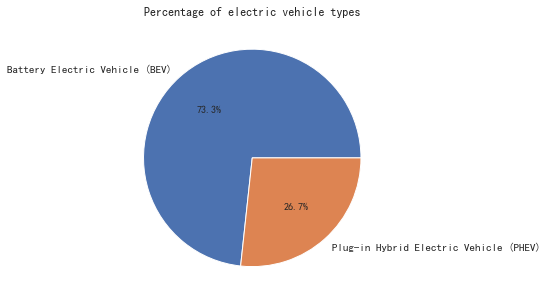

In [4]:
#新建画布
plt.figure(figsize = (5,5))
plt.pie(list(df.values.astype(float)),labels = list(df.index),autopct='%.1f%%')
#添加标题
plt.title('Percentage of electric vehicle types')
#添加y轴名字
plt.ylabel('')
#保存图片
plt.savefig('图片/Percentage of electric vehicle types.png',bbox_inches = 'tight',dpi = 300)
plt.show()

In [5]:
#计算每年的数量
df = datas.groupby('Model Year').size()
df

Model Year
1993        1
1997        1
1998        1
1999        3
2000        7
2002        2
2008       27
2010       29
2011      872
2012     1793
2013     4954
2014     3816
2015     5157
2016     6456
2017     9878
2018    13940
2019    10615
2020    11026
2021    11109
2022       80
dtype: int64

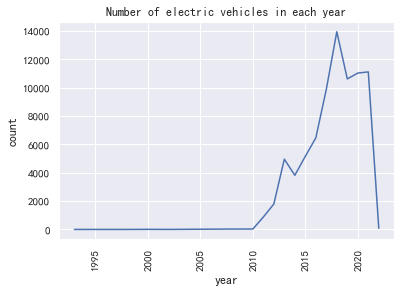

In [6]:
#绘制折线图
plt.figure()#新建画布
plt.plot(df.index,df.values)#绘制折线图
#添加标题
plt.title('Number of electric vehicles in each year')
#添加y轴名字
plt.ylabel('count')
#添加x轴名字
plt.xlabel('year')
#旋转X轴标签
plt.xticks(rotation = 90)
#保存图片
plt.savefig('图片/Number of electric vehicles in each year.png',bbox_inches = 'tight',dpi = 300)
plt.show()

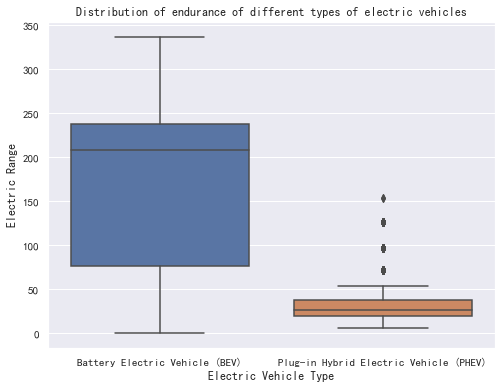

In [7]:
#新建画布
plt.figure(figsize = (8,6))
#绘制不同类别的箱型图
sns.boxplot(x="Electric Vehicle Type", y="Electric Range", data=datas)
#添加标题
plt.title('Distribution of endurance of different types of electric vehicles')
#保存图片
plt.savefig('图片/Distribution of endurance of different types of electric vehicles.png',bbox_inches = 'tight',dpi = 300)
plt.show()

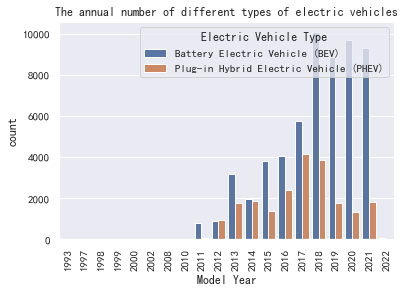

In [8]:
#新建画布
plt.figure()
#绘制不同类别的盒形图
sns.countplot(x="Model Year", hue="Electric Vehicle Type", data=datas)
#添加标题
plt.title('The annual number of different types of electric vehicles')
#旋转标签
plt.xticks(rotation = 90)
#保存图片
plt.savefig('图片/The annual number of different types of electric vehicles.png',bbox_inches = 'tight',dpi = 300)
plt.show()

In [9]:
#不同品牌的Legislative District平均水平，并且排序
df = datas.groupby('Make')['Legislative District'].mean().sort_values()
df

Make
WHEEGO ELECTRIC CARS    14.000000
BENTLEY                 21.000000
DODGE                   22.000000
CADILLAC                25.978022
TH!NK                   26.333333
MITSUBISHI              26.929961
SUBARU                  27.113636
FISKER                  27.214286
JEEP                    27.253521
FORD                    27.380984
HYUNDAI                 27.531739
CHRYSLER                27.792904
CHEVROLET               27.884418
TOYOTA                  28.550646
LINCOLN                 28.633333
HONDA                   28.726428
KIA                     28.798905
SMART                   29.453532
JAGUAR                  30.052083
NISSAN                  30.568996
MERCEDES-BENZ           31.061433
FIAT                    31.097561
TESLA                   31.221280
VOLKSWAGEN              31.230472
BMW                     31.596132
PORSCHE                 32.088803
VOLVO                   32.165652
MINI                    32.375385
LAND ROVER              32.461538
AUDI     

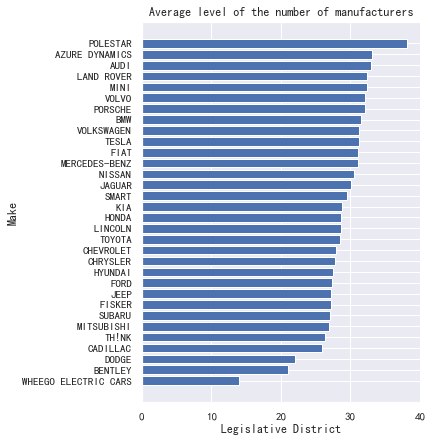

In [13]:
#新建画布
plt.figure(figsize = (5,7))
plt.barh(df.index,df.values)
#添加标题
plt.title('Average level of the number of manufacturers')
#添加y轴名字
plt.xlabel('Legislative District')
plt.ylabel('Make')
#保存图片
plt.savefig('图片/Average level of the number of manufacturers.png',bbox_inches = 'tight',dpi = 300)
plt.show()

In [11]:
#对每年，每个品牌计算数量
dff = pd.crosstab(datas["Make"],datas["Model Year"],datas['City'],aggfunc=len)
#缺失值用0填补
dff = dff.fillna(0)
dff

Model Year,1993,1997,1998,1999,2000,2002,2008,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Make,,,,,,,,,,,,,,,,,,,,
AUDI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,208.0,181.0,143.0,383.0,227.0,481.0,0.0
AZURE DYNAMICS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BENTLEY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
BMW,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,488.0,418.0,410.0,715.0,583.0,229.0,145.0,483.0,0.0
CADILLAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,0.0,18.0,3.0,11.0,0.0,0.0,0.0,0.0
CHEVROLET,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,522.0,875.0,749.0,496.0,297.0,2856.0,1084.0,1065.0,1134.0,407.0,36.0
CHRYSLER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,563.0,119.0,322.0,297.0,0.0
DODGE,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FIAT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,107.0,245.0,151.0,155.0,2.0,2.0,0.0,0.0,0.0


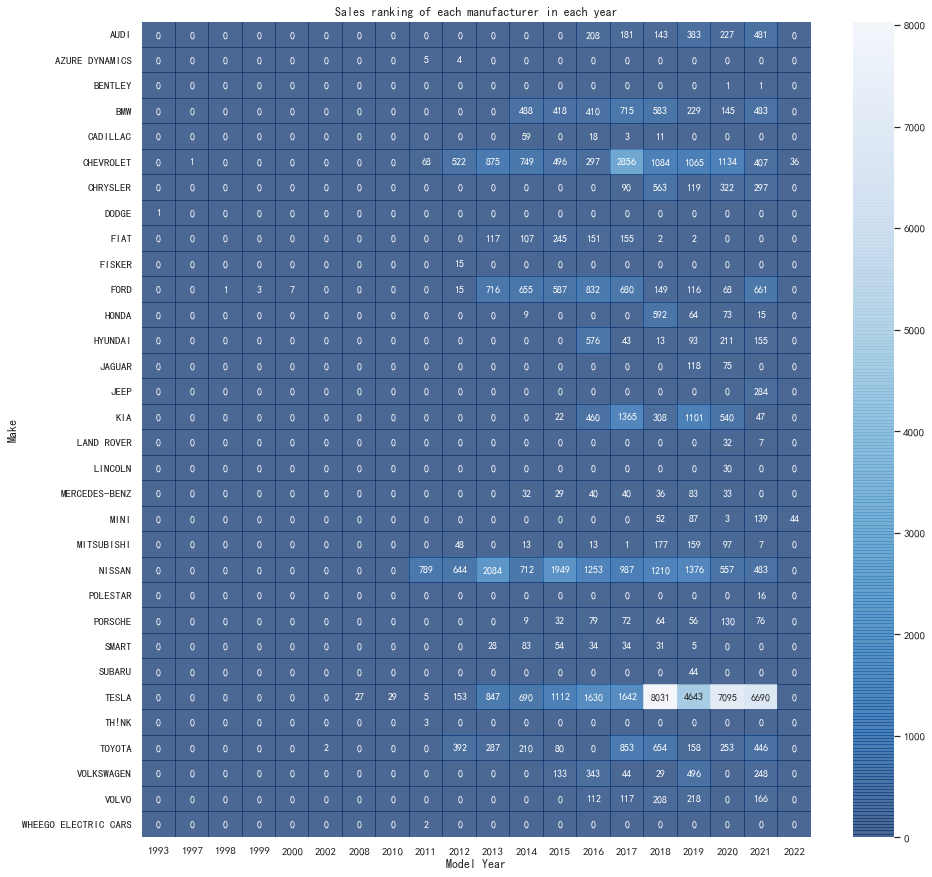

In [14]:
plt.figure(figsize = (15,15))
#绘制热力图
sns.heatmap(dff, annot=True, fmt=".0f",cmap = 'Blues_r',alpha = 0.7)
plt.title('Sales ranking of each manufacturer in each year')
#保存图片
plt.savefig('图片/Sales ranking of each manufacturer in each year.png',bbox_inches = 'tight',dpi = 300)
plt.show()